### The force applied by the eddy current

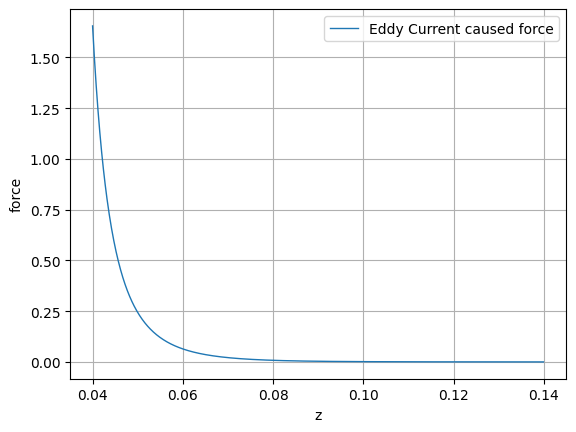

In [22]:
from numpy import *
import matplotlib.pyplot as plt
from kit.functions import F

#save path
path = '/Users/gansz/Downloads/CUPT2024/PythonAnalysis/plots/forceByEddyCurrent_F1-4.png'

h = [0.0] * 1000

dt = 0.0001

for i in range(1000):
    h[i] = i*dt + 0.04


F_arr = [0.0] * 1000

for i in range(1000):
    F_arr[i] = -F(h[i])

x = np.array(h)
y = np.array(F_arr)


plt.plot(x,y, lw='1', label='Eddy Current caused force')
plt.legend()

plt.grid()
plt.xlabel('z')
plt.ylabel('force')

plt.savefig(path, dpi=320)
plt.show()

plt.close()




### Only contain Current force and Gravity

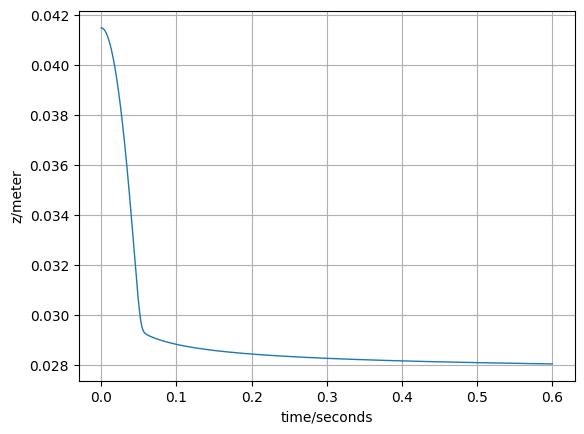

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from kit.Constants import *
from kit.functions import *

#开始迭代计算，不包含下方磁铁的作用力

#Initializations
dt = 0.00001
t_max = 0.6
steps = int(t_max / dt)

z = [0.0] * steps
z1 = [0.0] * steps
z2 = [0.0] * steps


#Initial conditions
z[0] = H + h0

#Calculation
for i in range(steps - 1):
    if z[i] < H or z[i] > 1:
        steps = i
        print(f"final {i}, {z[i]}")
        break
    z2[i] = (z1[i] * F(z[i])) - g
    z1[i + 1] = z1[i] + z2[i] * dt
    z[i + 1] = z[i] + z1[i] * dt
    # print(f"{i}, {z[i]}")


t = [0.0] * (steps)
for i in range(steps):
    t[i] = dt * (i + 1)
    
    
x = np.array(t)
y = np.array(z[0:steps:1])
# y = np.array(z)


plt.grid()
plt.xlabel('time/seconds')
plt.ylabel('z/meter')
plt.plot(x,y,lw='1')

### Magnitude of force and ratio of two force

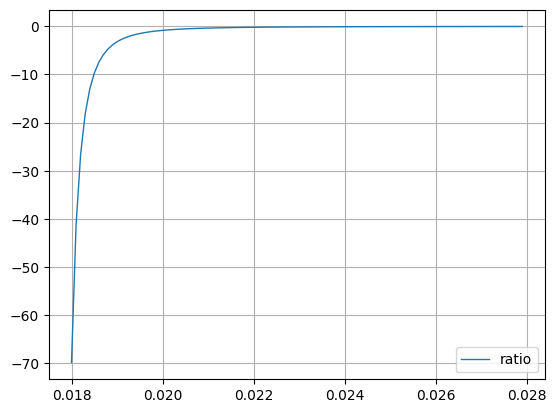

In [10]:
from kit.functions import *
import numpy as np
from matplotlib import pyplot as plt

z = [0.0] * 100
F_1 = [0.0]*100
F_2 = [0.0]*100
ratio = [0.0]*100
dz = 0.0001
for i in range(100):
    z[i] = 0.018 + dz * i
    F_1[i] = F(z[i])
    F_2[i] = F_m(z[i])
    ratio[i] = F_1[i]/F_2[i]

f1 = np.array(F_1)
f2 = np.array(F_2)
r = np.array(ratio)
z = np.array(z)
# plt.plot(z,f1x,lw='1',label='Eddy Current Force/(N*ss/m)')
# plt.plot(z,f2,lw='1',label='Magnetic Force/(N)')
plt.plot(z,ratio,lw='1',label='ratio')
plt.grid()
plt.legend()

plt.show()

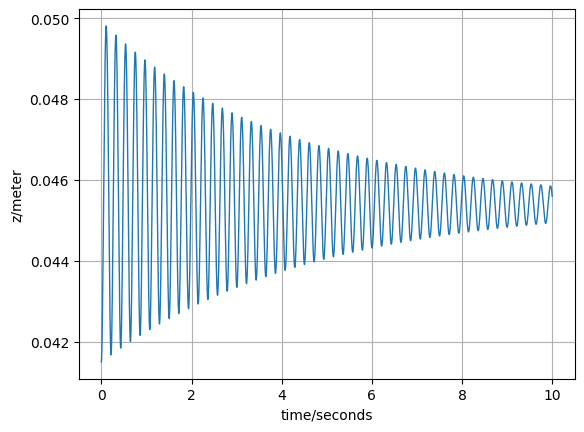

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kit.Constants import *
from kit.functions import *

#开始迭代计算，不包含下方磁铁的作用力

#Initializations
dt = 0.0001
t_max = 10
steps = int(t_max / dt)

z = [0.0] * steps
z1 = [0.0] * steps
z2 = [0.0] * steps


#Initial conditions
z[0] = H + h0

#Calculation
for i in range(steps - 1):
    if z[i] < H or z[i] > 1:
        steps = i
        print(f"final {i}, {z[i]}")
        break
    z2[i] = (z1[i] * F(z[i])) - g + F_m(z[i])
    z1[i + 1] = z1[i] + z2[i] * dt
    z[i + 1] = z[i] + z1[i] * dt
    # print(f"{i}, {z[i]}")


t = [0.0] * (steps)
for i in range(steps):
    t[i] = dt * (i + 1)
    
    
x = np.array(t)
y = np.array(z[0:steps:1])
# y = np.array(z)


plt.grid()
plt.xlabel('time/seconds')
plt.ylabel('z/meter')
plt.plot(x,y,lw='1')